# DA301: Advanced Analytics for Organisational Impact

# Module 1

# 1. Load and explore the data

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# load the CSV file as reviews
reviews = pd.read_csv("turtle_reviews.csv")
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# explore the data
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [4]:
reviews.shape

(2000, 11)

In [5]:
# any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

There are no missing values

In [6]:
# descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


# 2. Drop columns

In [7]:
# drop unnecessary columns
reviews = reviews.drop(columns=["language", "platform"])

In [8]:
# view column names
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


# 3. Rename columns

In [9]:
# rename the column headers
reviews = reviews.rename(columns={'remuneration (k£)': 'remun', 
                                  'spending_score (1-100)': 'spending', 
                                  'loyalty_points': 'points'})

# view column names
reviews.columns

Index(['gender', 'age', 'remun', 'spending', 'points', 'education', 'product',
       'review', 'summary'],
      dtype='object')

# 4. Save the DataFrame as a CSV file

In [10]:
# create a CSV file as output
reviews.to_csv('reviews.csv')

In [11]:
# import new CSV file with Pandas
reviews2 = pd.read_csv('reviews.csv')

# view DataFrame
reviews2.head()

,Unnamed: 0,gender,age,remun,spending,points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# determine whether there are missing values
reviews2.isna().sum()

Unnamed: 0    0
gender        0
age           0
remun         0
spending      0
points        0
education     0
product       0
review        0
summary       0
dtype: int64

# 5. linear regression

In [13]:
# Install the statsmodels package.
!pip install statsmodels

# Import the necessary libraries.
import statsmodels.api as sm
from sklearn import datasets
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# 5a) spending vs loyalty

In [14]:
# independent variable
x = reviews2['spending']
# dependent variable
y = reviews2['points']

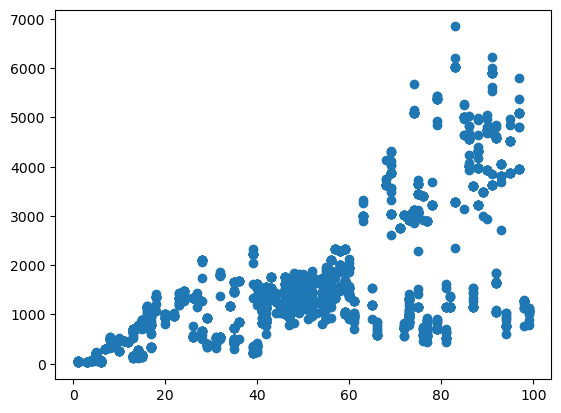

In [15]:
# check for linearity with Matplotlib
plt.scatter(x, y)

In [16]:
# OLS model and summary
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          2.92e-263
Time:                        19:29:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews2['spending']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending, Length: 2000, dtype: float64

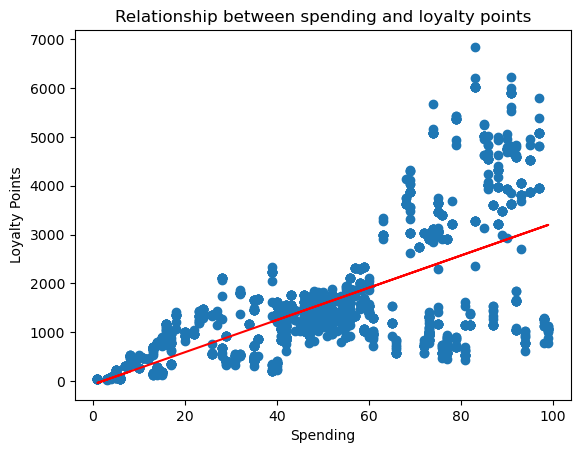

In [19]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# plot the regression line
plt.plot(x, y_pred, color='red')

# view the plot
plt.title("Relationship between spending and loyalty points")
plt.xlabel("Spending")
plt.ylabel("Loyalty Points")
plt.show()

# 5b) remuneration vs loyalty

In [20]:
# Independent variable.
x = reviews2[['remun']]

# Dependent variable.
y = reviews2['points']

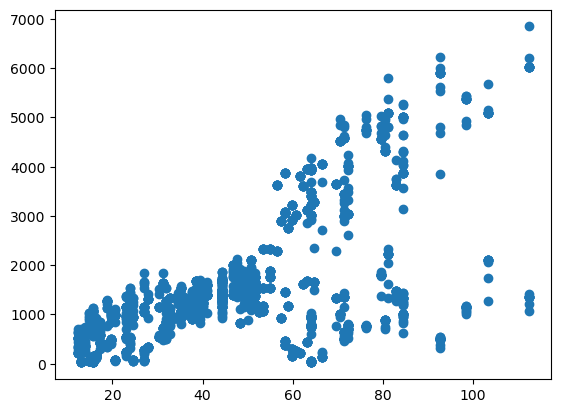

In [21]:
# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [22]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          2.43e-209
Time:                        19:29:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * reviews2['remun']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remun, Length: 2000, dtype: float64

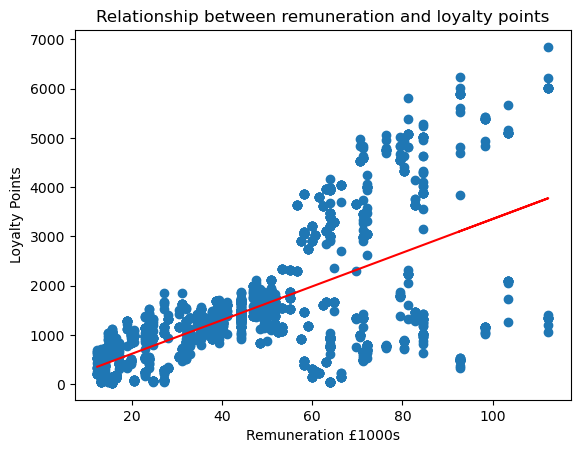

In [25]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# plot the regression line
plt.plot(x, y_pred, color='red')

# view the plot
plt.title("Relationship between remuneration and loyalty points")
plt.xlabel("Remuneration £1000s")
plt.ylabel("Loyalty Points")
plt.show()

# 5c) age vs loyalty

In [26]:
# Independent variable.
x = reviews[['age']]

# Dependent variable.
y = reviews['points']

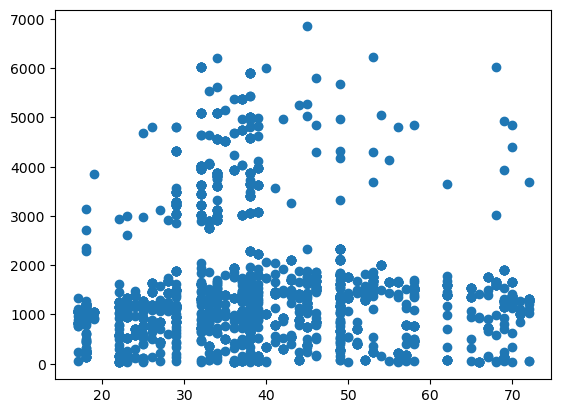

In [27]:
# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [28]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 02 Aug 2023   Prob (F-statistic):             0.0577
Time:                        19:29:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [30]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * reviews2['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

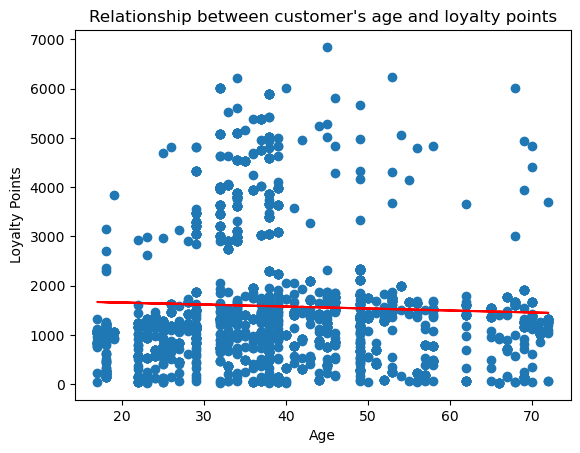

In [31]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# plot the regression line
plt.plot(x, y_pred, color='red')

# view the plot
plt.title("Relationship between customer's age and loyalty points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
plt.show()

# 5d) spending, remuneration and age vs loyalty

In [32]:
# Independent variables.
x = reviews2[['age', 'spending', 'remun']]

# Dependent variable.
y = reviews2['points']

In [33]:
x = sm.add_constant(x)

In [34]:
# fit the model
mlr = sm.OLS(y, x).fit()

In [35]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:29:45   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2203.0598     52.361    -42.075      0.0

In [36]:
# Set the X coefficients and the constant to generate the regression table.
y_pred_mlr = -2203.0598 + 11.0607 * reviews2['age'] + 34.1832 * reviews2['spending'] + 34.0084 * reviews2['remun']

# view the output
y_pred_mlr.head()

0    -252.519080
1    1238.478820
2   -1308.434992
3    1151.754308
4       3.348396
dtype: float64

In [37]:
# test the model

# split the data in train (80%) and test (20%) sets 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=5)

In [38]:
# train the model using statsmodel
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
y_pred = model.predict(sm.add_constant(x_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:29:45   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2203.3411     58.253    -37.824      0.0

In [39]:
# test the trained model
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_mlr = mlr.predict(x_test)
print("prediction for test set: {}".format(y_pred_mlr))

prediction for test set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03


In [40]:
# print the r^2 of the test set
print(mlr.score(x_test, y_test))

0.853050388163067


In [41]:
# check the multiple regression model for multicollinearity
x_review = sm.add_constant(x)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_review.values, i) for i in range(x_review.values.shape[1])]
vif["features"] = x_review.columns
print(vif.round(2))

   VIF Factor  features
0       20.77     const
1        1.05       age
2        1.05  spending
3        1.00     remun


# 6. Observations

OLS regression of each of the individual variables has a very low R^2. This indicates that, on their own, they do not explain a significant amount of the variation in loyalty points. Spending and remuneration both have values lower than 0.5, while R^2 from the model using age to predict loyalty points is negligible. However, a multiple regression taking using the three variables together has a much higher R^2 of 0.84, indicating that a combination of the three variables can explain a much higher portion of the variation in Loyalty Points. Furthermore, VIF test results indicate that correlation between the independent variables does not have a significant impact on the model. Thus we can be more confident that the model's R^2 is not inflated by multicollinearity.

# Module 2:

# 1. Load and explore the data

In [42]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the csv files as df2
df2 = pd.read_csv("reviews.csv")
# view DataFrame
df2.head()

,Unnamed: 0,gender,age,remun,spending,points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Drop unnecessary columns.
dfK = df2.drop(columns=["Unnamed: 0", "gender", "age", "points", "education", "product", "review", "summary"])
# View DataFrame
dfK.columns

Index(['remun', 'spending'], dtype='object')

In [45]:
# Explore the data.
dfK.dtypes

remun       float64
spending      int64
dtype: object

In [46]:
# Any missing values?
dfK.isna().sum()

remun       0
spending    0
dtype: int64

In [47]:
# Descriptive statistics.
dfK.describe()

,remun,spending
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


# 2. Plot

<AxesSubplot:xlabel='remun', ylabel='spending'>

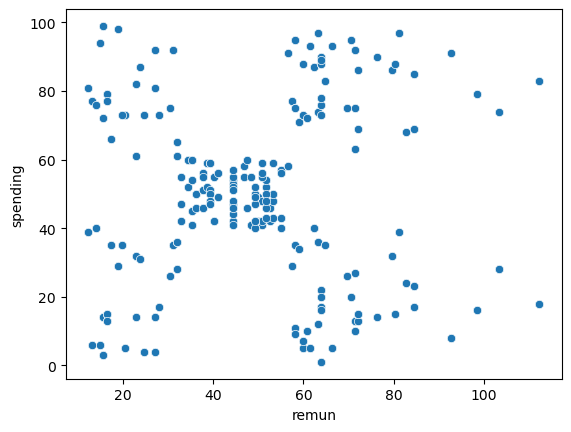

In [48]:
# create a scatterplot with seaborn
sns.scatterplot(x='remun',
                y='spending',
                data=dfK)

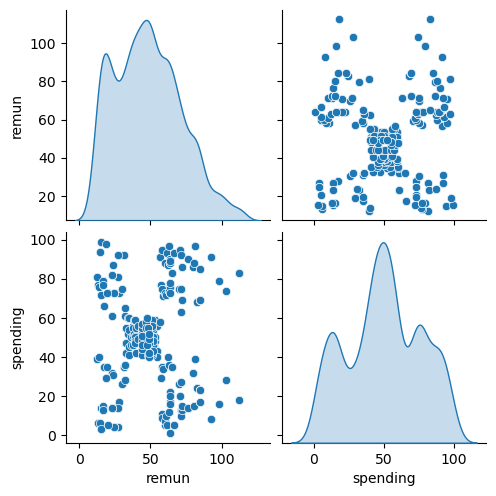

In [49]:
# Create a pairplot with Seaborn.
x = dfK[['remun', 'spending']]
sns.pairplot(dfK,
             vars=x,
             diag_kind='kde')

# 3. Elbow and silhouette methods

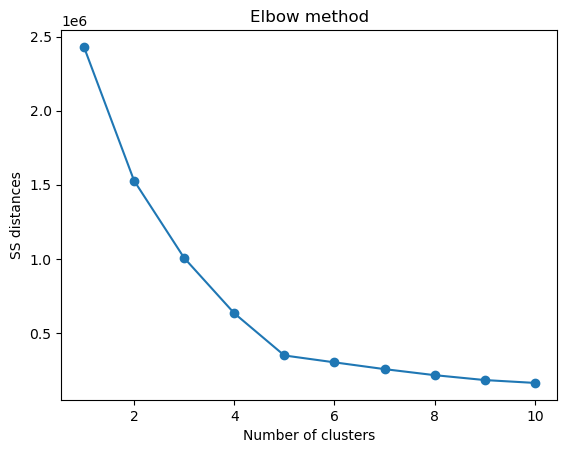

In [50]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
# plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')
# insert labels and title
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distances")
plt.show()

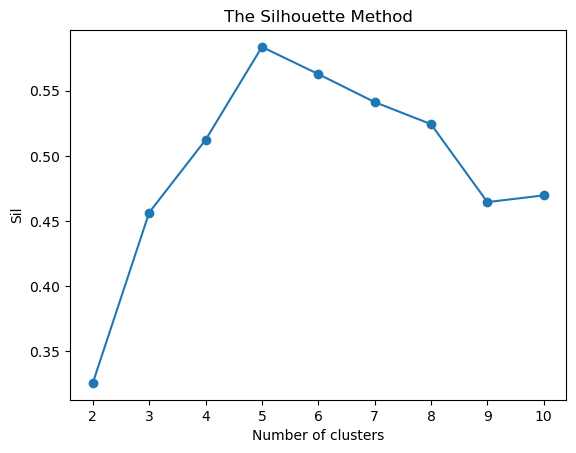

In [51]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                               metric='euclidean'))
# plot the silhouette method
plt.plot(range(2, kmax+1),
         sil,
         marker='o')
# insert labels and title
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

# 4. Evaluate K-means model at different values of k

In [52]:
# use five clusters
kmeans = KMeans(n_clusters = 5,
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

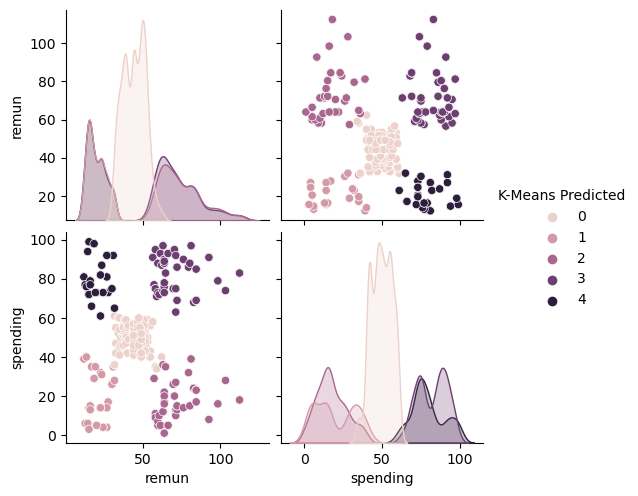

In [53]:
# plot
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')

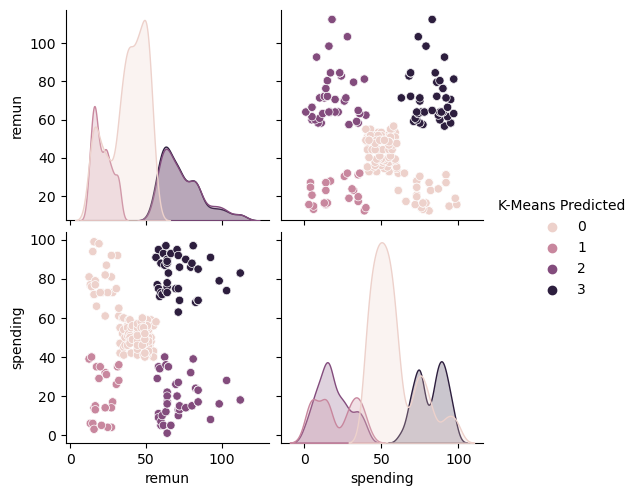

In [54]:
# using 4 clusters
kmeans = KMeans(n_clusters = 4,
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# plot
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')

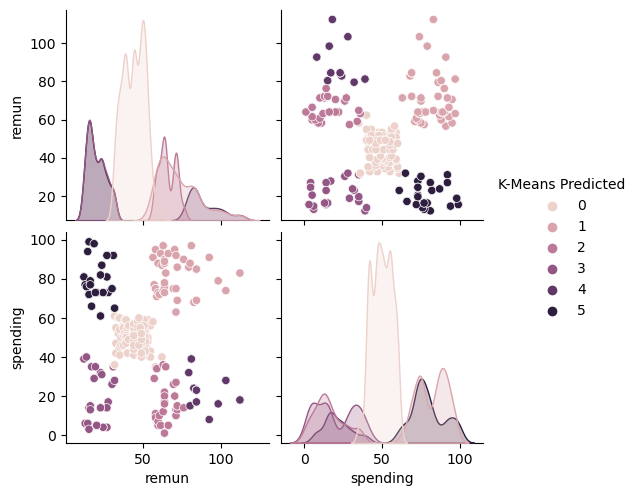

In [55]:
# using 6 clusters
kmeans = KMeans(n_clusters = 6,
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
# plot
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')

# 5. Final model and justify your choice

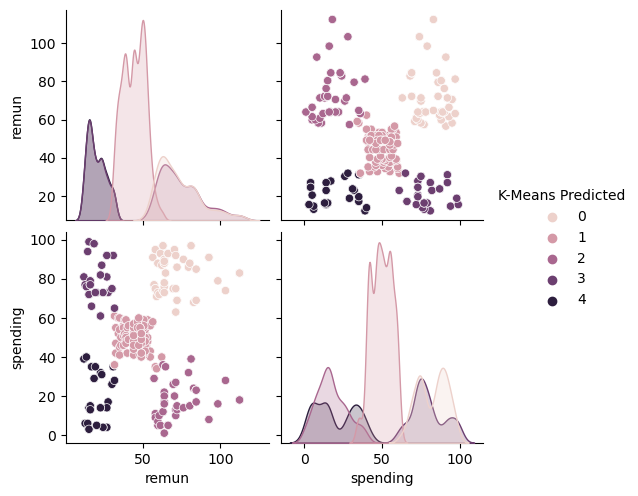

In [56]:
# apply the final model: 5 clusters
kmeans = KMeans(n_clusters = 5,
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# plot
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')

In [57]:
# check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

# 6. Plot and interpret the clusters

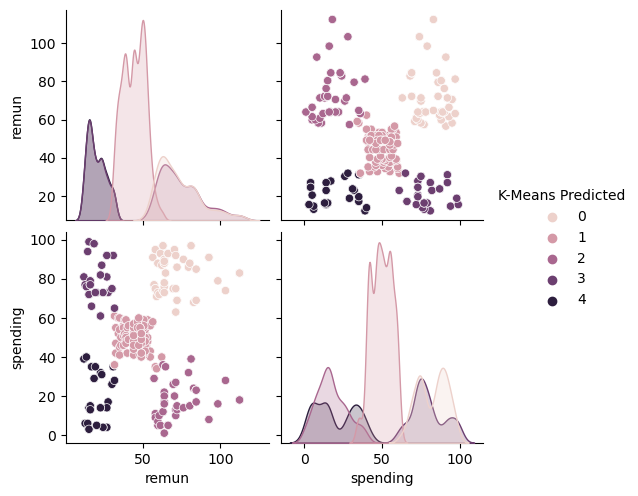

In [58]:
# visualise the clusters
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind='kde')


In [59]:
# view the DataFrame
print(x.head())

   remun  spending  K-Means Predicted
0  12.30        39                  4
1  12.30        81                  3
2  13.12         6                  4
3  13.12        77                  3
4  13.94        40                  4


In [60]:
# make a dataframe per cluster
cluster0 = x[x['K-Means Predicted'] == 0]
cluster1 = x[x['K-Means Predicted'] == 1]
cluster2 = x[x['K-Means Predicted'] == 2]
cluster3 = x[x['K-Means Predicted'] == 3]
cluster4 = x[x['K-Means Predicted'] == 4]

In [61]:
# view a summary of cluster 0
cluster0.describe()

,remun,spending,K-Means Predicted
count,356.000000,356.000000,356.0
mean,73.240281,82.008427,0.0
std,13.557856,9.342765,0.0
min,56.580000,63.000000,0.0
25%,63.140000,74.000000,0.0
50%,71.340000,83.000000,0.0
75%,81.180000,90.000000,0.0
max,112.340000,97.000000,0.0


In [62]:
# view a summary of cluster 1
cluster1.describe()

,remun,spending,K-Means Predicted
count,774.000000,774.000000,774.0
mean,44.418786,49.529716,1.0
std,7.088279,6.484414,0.0
min,31.980000,34.000000,1.0
25%,38.540000,44.000000,1.0
50%,44.280000,50.000000,1.0
75%,50.020000,55.000000,1.0
max,62.320000,61.000000,1.0


In [63]:
# view a summary of cluster 2
cluster2.describe()

,remun,spending,K-Means Predicted
count,330.000000,330.000000,330.0
mean,74.831212,17.424242,2.0
std,13.638540,9.515402,0.0
min,57.400000,1.000000,2.0
25%,63.960000,10.000000,2.0
50%,71.340000,16.000000,2.0
75%,82.820000,23.750000,2.0
max,112.340000,39.000000,2.0


In [64]:
# view a summary of cluster 3
cluster3.describe()

,remun,spending,K-Means Predicted
count,269.000000,269.000000,269.0
mean,20.353680,79.416357,3.0
std,5.737253,10.395781,0.0
min,12.300000,61.000000,3.0
25%,15.580000,73.000000,3.0
50%,19.680000,77.000000,3.0
75%,24.600000,87.000000,3.0
max,31.980000,99.000000,3.0


In [65]:
# view a summary of cluster 4
cluster4.describe()

,remun,spending,K-Means Predicted
count,271.000000,271.000000,271.0
mean,20.424354,19.763838,4.0
std,5.719723,12.666796,0.0
min,12.300000,3.000000,4.0
25%,15.580000,6.000000,4.0
50%,19.680000,15.000000,4.0
75%,24.600000,32.000000,4.0
max,31.980000,40.000000,4.0


# 7. Discuss: Insights and observations

The data initially appears to be split into 5 groups, with the largest at the centre. Both the elbow and silhouette methods show 5 as the ideal number of clusters for a K-Means model. Thus 5 has been selected as the number of clusters for the model. However, 4 and 6 clusters are also tested to compare the output and explore the data further. One problem with the 5 clusters model is that it the clusters are not of similar sizes. However, when testing models with 4 and 6 clusters this persists. The middle cluster (cluster 0) continues to be the largest by far. This suggests that a model using 5 clusters may still be the most appropriate.

# Module 3:

# 1. Load and explore the data

In [66]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [67]:
# Load the data set as df3.
df3 = pd.read_csv("reviews.csv")

# View DataFrame.
df3.head()

,Unnamed: 0,gender,age,remun,spending,points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [68]:
# Explore the data.
df3.dtypes

Unnamed: 0      int64
gender         object
age             int64
remun         float64
spending        int64
points          int64
education      object
product         int64
review         object
summary        object
dtype: object

In [69]:
# Drop unnecessary columns.
df3 = df3.drop(columns=["Unnamed: 0", "gender", "age", "spending", "remun", "points", "education", "product"])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [70]:
# Any missing values?
df3.isna().sum()

review     0
summary    0
dtype: int64

# 2. Prepare the data for NLP

# 2a) change to lower case and join the elements in each of the columns respectively (review and summary)

In [71]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()

# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()

In [72]:
# view the DataFrame
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [73]:
# explore the data
print(df3.shape)

(2000, 2)


# 2b) Replace punctuation in each of the columns respectively (review and summary)

In [74]:
# replace all the punctuations in review column
df3['review'] = df3['review'].str.replace('[^\w\s]', '')
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]', '')
# view the output
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


# 2c) Drop duplicates in both columns

In [75]:
# Drop duplicates in both columns.
df3.drop_duplicates()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


# 3. Tokenise and create wordclouds

In [76]:
# Create new DataFrame (copy DataFrame).
df4 = df3

In [77]:
# Apply tokenisation to both columns
# review
df4['r_tokens'] = df4['review'].apply(word_tokenize)

# summary
df4['s_tokens'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4.head()

,review,summary,r_tokens,s_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [78]:
# create lists for tokens
# reviews 
review_tokens = []
for i in range(df4.shape[0]):
    review_tokens = review_tokens + df4['r_tokens'][i]
    
# summary
summary_tokens = []
for i in range(df4.shape[0]):
    summary_tokens = summary_tokens + df4['s_tokens'][i]

In [79]:
# convert reviews_tokens to string
review_string = ''
for value in review_tokens:
    review_string = review_string + value + ' '

In [80]:
# Review: Create a word cloud.
wordcloud_r = WordCloud(width =1600, height = 900,
                      background_color = 'white',
                      colormap='plasma',
                      min_font_size = 10).generate(review_string)

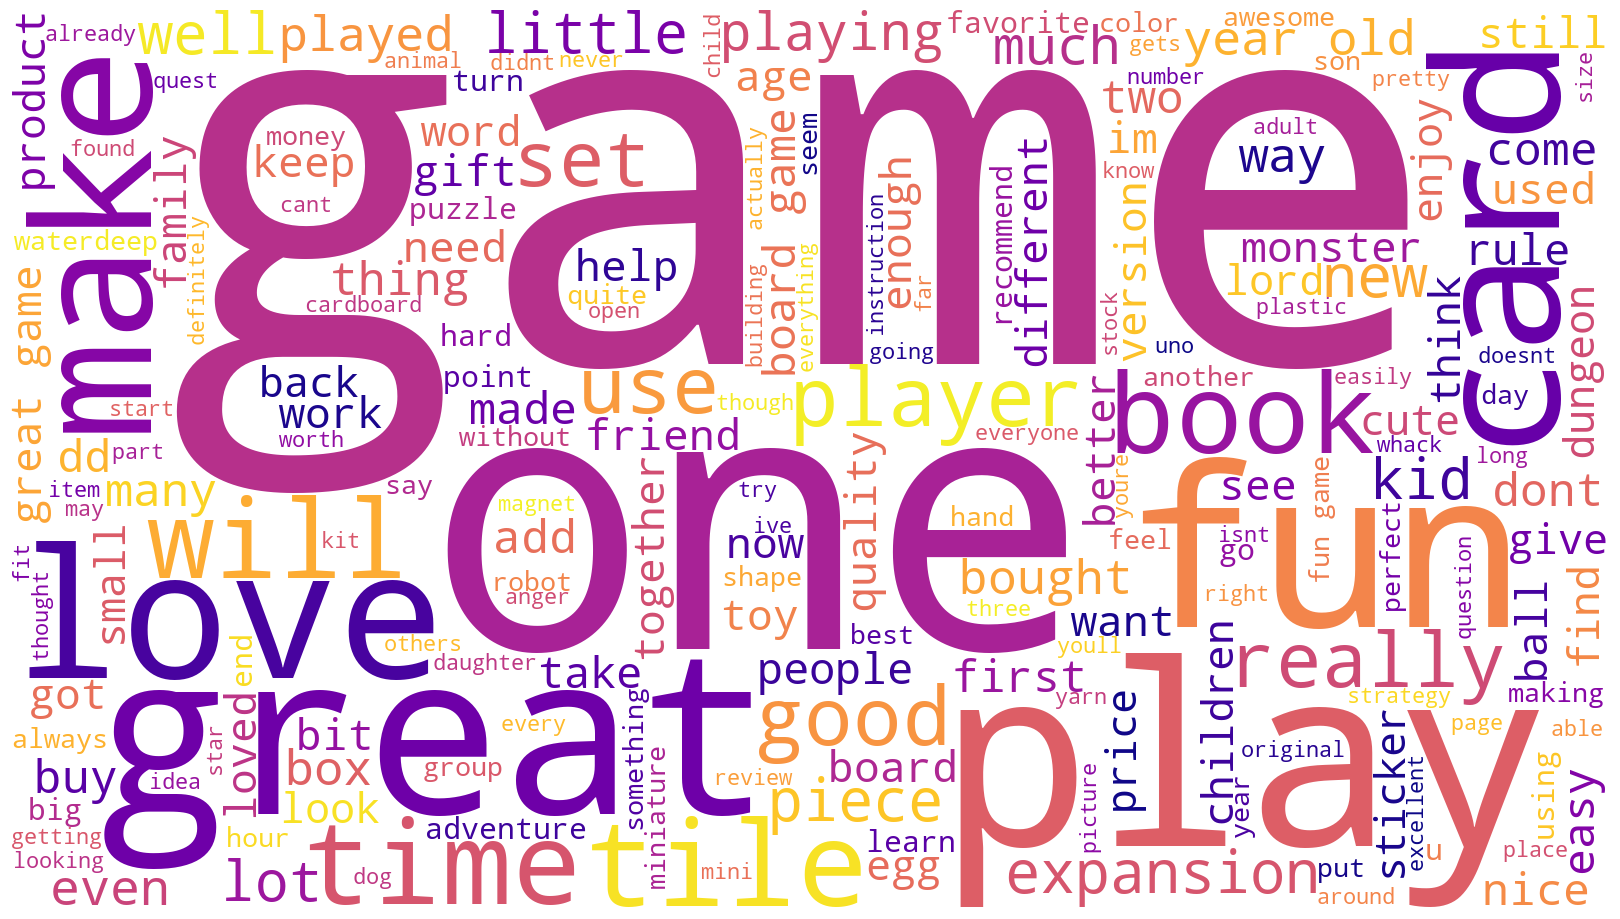

In [81]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud_r)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [82]:
# Summary: Create a word cloud.
wordcloud_s = WordCloud(width =1600, height = 900,
                      background_color = 'white',
                      colormap='plasma',
                      min_font_size = 10).generate(summary_string)

NameError: name 'summary_string' is not defined

In [ ]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud_s)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# 4. Frequency ditribution and polarity

# 4a) Create frequency distribution

In [ ]:
# determine the frequency distribution for review
from nltk.probability import FreqDist
fdist_r = FreqDist(review_tokens)
fdist_r

In [ ]:
# determine the frequency distribution for summary
fdist_r = FreqDist(summary_tokens)
fdist_r

# 4b) Remove alphanumeric characters and stopwords

In [ ]:
# delete all the alphanum
review_tokens = [word for word in review_tokens if word.isalnum()]

review_tokens

In [ ]:
# delete all the alphanum
summary_tokens = [word for word in summary_tokens if word.isalnum()]

summary_tokens

In [ ]:
# remove all the stopwords
# get english_stopwords
english_stopwords = set(stopwords.words('english'))

# remove stopwords for review
review_tokens = [x for x in review_tokens if x.lower() not in english_stopwords]

# view
review_tokens

In [ ]:
# remove stopwords for summary
summary_tokens = [x for x in summary_tokens if x.lower() not in english_stopwords]

# view
summary_tokens

In [ ]:
# convert reviews_tokens to string
review_string = ''
for value in review_tokens:
    review_string = review_string + value + ' '

In [ ]:
# convert summary_tokens to string
summary_string = ''
for value in summary_tokens:
    summary_string = summary_string + value + ' '

# 4c) Create wordcloud without stopwords

In [ ]:
# create a wordcloud without stop words for reviews
wordcloud_r = WordCloud(width =1600, height = 900,
                      background_color = 'white',
                      colormap='plasma',
                      min_font_size = 10).generate(review_string)

In [ ]:
# plot the wordcloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud_r)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# create a wordcloud without stop words for summary
wordcloud_s = WordCloud(width =1600, height = 900,
                      background_color = 'white',
                      colormap='plasma',
                      min_font_size = 10).generate(summary_string)

In [ ]:
# plot the wordcloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud_s)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 4d) Identify the 15 most common words and polarity

In [ ]:
# determine the 15 most common words in review
counts = pd.DataFrame(Counter(review_tokens).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')

counts

In [ ]:
# determine the 15 most common words in summary
counts = pd.DataFrame(Counter(summary_tokens).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')

counts

# 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns

In [ ]:
# prepare workstation
# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

# download lexicon
nltk.download('vader_lexicon')

In [ ]:
# estimate sentiment from review tokens
r_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4['r_tokens']}

# turn into DataFrame
reviews_polarity = pd.DataFrame(r_polarity).T

In [ ]:
# view the reviews_polarity DataFrame
reviews_polarity.head()

In [ ]:
# estimate sentiment from summary tokens
s_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4['s_tokens']}

# turn into DataFrame
summary_polarity = pd.DataFrame(s_polarity).T

In [ ]:
# view the summary_polarity DataFrame
summary_polarity.head()

In [ ]:
# Determine subjectivity from tokens
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine subjectivity of both columns
df4['subjectivity_r'] = df4['review'].apply(generate_subjectivity)

df4['subjectivity_s'] = df4['summary'].apply(generate_subjectivity)

In [ ]:
# remove tokenised columsn for easier visualisation
df5 = df4.drop(columns=["r_tokens", "s_tokens"])
# view subjectivity
df5.head()

In [ ]:
# review: Create a histogram plot with bins = 15.
# histogram for polarity
num_bins = 15

# set the plot area
plt.figure(figsize=(16,9))

# define the bars
n, bins, patches = plt.hist(reviews_polarity['compound'], 
                            num_bins,
                            facecolor='red',
                            alpha=0.6)

# set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=12)

plt.show()

In [ ]:
# summary: Create a histogram plot with bins = 15
# histogram for polarity
num_bins = 15

# set the plot area
plt.figure(figsize=(16,9))

# define the bars
n, bins, patches = plt.hist(summary_polarity['compound'], 
                            num_bins,
                            facecolor='red',
                            alpha=0.6)

# set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=12)

plt.show()


# 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# top 20 positive reviews
positive_reviews = reviews_polarity.nlargest(20, 'compound')

# View output.
positive_reviews

In [ ]:
# top 20 positive summaries
positive_summary = summary_polarity.nlargest(20, 'compound')

# View output.
positive_summary

In [ ]:
# top 20 negative reviews
negative_reviews = reviews_polarity.nsmallest(20, 'compound')

# View output.
negative_reviews

In [ ]:
# top 20 negative summaries
negative_summary = summary_polarity.nsmallest(20, 'compound')

# View output.
negative_summary

# 7. Discuss: Insights and observations

Overall, the sentiment revealed by the analysis of reviews and summaries is largely positive.
Many summaries show a largely neutral sentiment. However, we have identified some instances in which the algorithm used for the analysis may not be picking up some words as expressing positive or negative sentiment. For example, “five stars” is shown as completely neutral with 0 positive sentiment. The words five and stars on their own do not necessarily express any sentiment, however together and in context they express considerable satisfaction.
